# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [24]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [28]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [ ]:
#### What we see is the price senstitivty is not really a predictor for churn
##The top predictor would be the consumption in 12 months

In [44]:
# Add model training in here!
model = RandomForestClassifier() # Add parameters to the model!
random_fit=model.fit(X_train, y_train) # Complete this method call!

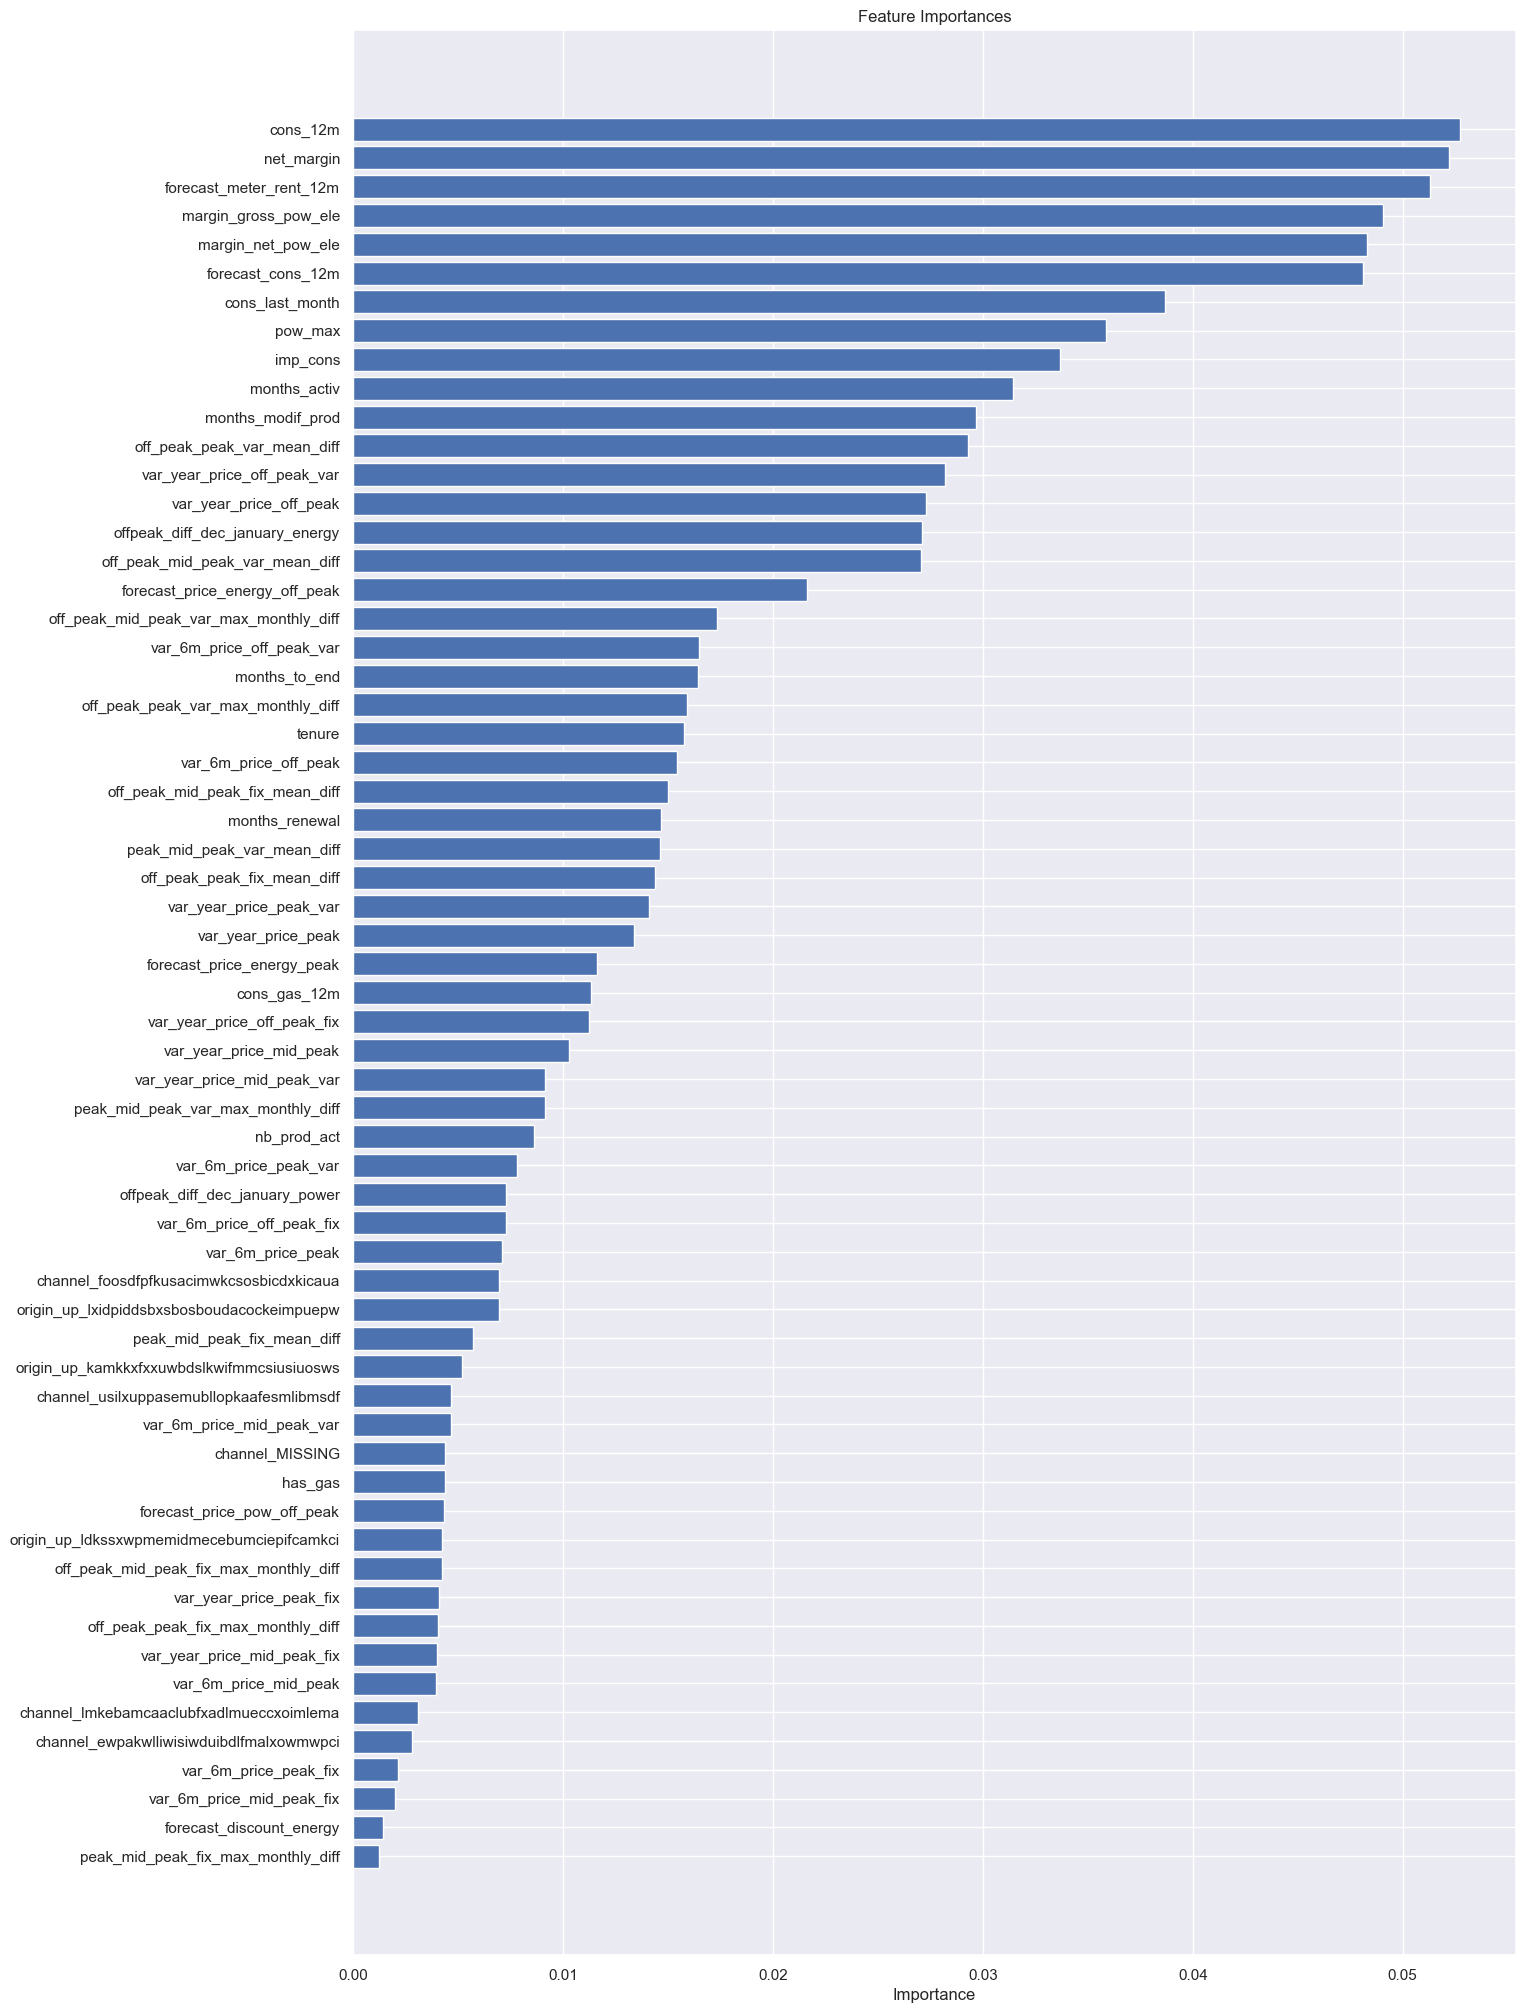

In [45]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [50]:
y_pred_random=model.predict_proba(X_test)
probabilities = y_pred_random[:, 1]

X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

X_test['churn'] = y_pred_random.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

In [62]:
# Calculate performance metrics here!

from sklearn.metrics import accuracy_score
# Keep a clean copy of X_test with only original features
X_test_clean = X_test.drop(columns=['churn', 'churn_probability'], errors='ignore')

# Now predict using only the features the model was trained on
y_pred = model.predict(X_test_clean)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.903


In [60]:
importances = model.feature_importances_
importances


array([0.0527537 , 0.01130877, 0.03869487, 0.04810569, 0.00141916,
       0.0512989 , 0.02162418, 0.01162083, 0.00431203, 0.00439128,
       0.03365637, 0.04908477, 0.0482996 , 0.00860161, 0.05219102,
       0.03585129, 0.02820484, 0.01407834, 0.00914003, 0.01124581,
       0.00407605, 0.00398171, 0.02728882, 0.01338511, 0.01029094,
       0.01644976, 0.00780824, 0.00464649, 0.00727276, 0.00211531,
       0.00197261, 0.01540193, 0.00708378, 0.00395738, 0.02707425,
       0.00728036, 0.02926793, 0.01461019, 0.02703259, 0.01436857,
       0.00570256, 0.01499974, 0.01590768, 0.00912572, 0.01731364,
       0.0040545 , 0.00122767, 0.0042313 , 0.01576693, 0.03145323,
       0.01644019, 0.0296682 , 0.01464244, 0.00439167, 0.00280742,
       0.0069274 , 0.00310394, 0.00465969, 0.0051618 , 0.00424572,
       0.00692064])

In [64]:
#### The most important feature is the net_margin and the price peaks and max monthly diff are very low in feature importance

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                                     Feature  Importance
0                                   cons_12m    0.052754
14                                net_margin    0.052191
5                    forecast_meter_rent_12m    0.051299
11                      margin_gross_pow_ele    0.049085
12                        margin_net_pow_ele    0.048300
..                                       ...         ...
54  channel_ewpakwlliwisiwduibdlfmalxowmwpci    0.002807
29                     var_6m_price_peak_fix    0.002115
30                 var_6m_price_mid_peak_fix    0.001973
4                   forecast_discount_energy    0.001419
46        peak_mid_peak_fix_max_monthly_diff    0.001228

[61 rows x 2 columns]


In [66]:
import numpy as np
##The customers are not accurately predicted as being churned
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.04644808743169399

In [68]:
##When they are considered turned about 77% are precise
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7727272727272727